## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats as st
from functools import reduce
import math
from scipy.stats import levene

In [ ]:
# Функция для вывода необходимой информации для первичной проверки данных
# Включает в себя: Общую информацию о датасете, описательную статистику и количество дублей
def check_data (df):
  print('ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ'),\
  print('----------------------------------------'),\
  print(df.info()),\
  print(),\
  print('ОПИСАТЕЛЬНАЯ СТАТИСТИКА'),\
  print('----------------------------------------'),\
  print(df.describe()),\
  print('----------------------------------------'),\
  print(),\
  print('Количество задбулированных значений', df.duplicated().sum())

Проведем проверку данных - применим функцию сheck_data к нашим детасетам.  
Для удобства работы, сделаем это не в цикле, а отдельном в каждом блоке

**Таблица "Пользователи"**

In [ ]:
df_users.sample(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
312,1312,21,NaN,Санкт-Петербург,Тамара,Поликарпова,2018-07-29,smart
36,1036,47,NaN,Санкт-Петербург,Анжелика,Андропова,2018-07-14,smart
42,1042,42,NaN,Хабаровск,Константин,Добрынин,2018-11-25,smart
102,1102,28,NaN,Москва,Марта,Королькова,2018-06-16,smart
478,1478,75,NaN,Грозный,Таира,Константинова,2018-07-16,smart
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
319,1319,70,NaN,Санкт-Петербург,Харитон,Парфенов,2018-08-24,smart
393,1393,56,NaN,Краснодар,Артём,Зубков,2018-02-17,smart
263,1263,32,NaN,Балашиха,Ермолай,Зайцев,2018-04-30,smart
420,1420,53,NaN,Сочи,Анатолий,Корольков,2018-09-19,smart


In [ ]:
check_data(df_users)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
----------------------------------------

Количество задбулированных значений 0


Поле "Дата подключения" *(reg_date)* имеет некорректный тип, с ним мы не сможем провести анализ.  
Переведем в datetime

In [ ]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

**Таблица "Звонки"**

In [ ]:
df_calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [ ]:
check_data(df_calls)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
----------------------------------------

Количество задбулированных значений 0


Аналогично,  "Дата звонка" *(call_date)* имеет некорректный тип.  
Выполним те же действия.

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

В описании проекта есть уточнение про нулевые минуты в звонках.  
Предположительно под ними подразумеваются *Пропущенные звонки*.  
Для принятия решения удалять эти данные или нет мы сравним средние в обоих вариантах  - с нулями  и без.  


In [ ]:
df_calls.loc[df_calls['duration'] != 0] ['duration'].describe()

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

Из статистики датасета без нулей мы видим, что распределение сместилось вправо, увеличилась медиана и среднее значение. Их разница в 0.65, стала меньше чем в датасете с нулями 0.75 Таким образом нулевые значения оказывали влияние, но не значительно. Так как их доля достаточно большая - 19%, то мы оставим датасет без изменений.

Исходя из вводных к проекту, округлим длительность звонков в большую сторону, то есть до полных минут.

In [ ]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

**Таблица "Сообщения"**

In [ ]:
df_messages.sample(15)

,id,message_date,user_id
107756,1433_363,2018-02-26,1433
52080,1231_701,2018-09-10,1231
63420,1277_97,2018-06-03,1277
108275,1433_882,2018-03-30,1433
26928,1113_87,2018-04-20,1113
28170,1121_297,2018-06-30,1121
99815,1409_116,2018-06-25,1409
87422,1364_156,2018-10-20,1364
56655,1251_119,2018-10-27,1251
22819,1096_99,2018-07-08,1096


In [ ]:
check_data(df_messages)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
----------------------------------------

Количество задбулированных значений 0


In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

**Таблица "Интернет"**

In [ ]:
df_internet.tail(15)

,id,mb_used,session_date,user_id
149381,1499_142,0.00,2018-11-01,1499
149382,1499_143,202.02,2018-10-11,1499
149383,1499_144,0.00,2018-11-27,1499
149384,1499_145,910.19,2018-12-04,1499
149385,1499_146,23.72,2018-10-22,1499
149386,1499_147,0.00,2018-10-21,1499
149387,1499_148,268.19,2018-11-13,1499
149388,1499_149,778.68,2018-11-24,1499
149389,1499_150,273.98,2018-11-20,1499
149390,1499_151,752.72,2018-10-11,1499


In [ ]:
check_data(df_internet)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000
----------------------------------------

Количество задбулированных значений 0


In [ ]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Проверим наличие нулевых значений в трафике, определим долю и эффект от удаления.

In [ ]:
df_internet.loc[df_internet['mb_used'] != 0] ['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

Если удалим нулевые значения, то потеряем 13% данных.  
Учитывая тот факт, что с нулевыми значениями средняя по отношению к медиане не имеет значительное отклонение, это решение будет не оправданным.  Оставим как есть.  

Можно предположить, что нулевые значения связаны в выходом в интернет не по инициативе пользовтеля, а самим пользователем допустим затраты интернет-трафика на получение MMS или получение электронных чеков по ссылке. То есть здесь мы говорим о том, что пользовтель сам не знает о пользовании интернетом *(люди пенсионного возраста)*.

Округлим интернет трафик до полных мегабайт.

In [ ]:
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)

**Таблица "Тарифы"**

В описании таблицы мы видим, что название столбца `tariff_name` не совпадает с названием столбца в таблице клиентов `df_users`, т.е. мы не сможем испоьзовать это поле как ключ, при соединеии таблиц. Необходимо переименовать.

In [ ]:
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод
***
1. Данные в хорошем состоянии - пропуском нет *(или они обоснованы)*, дубликатов нет. 
2. Во всех рабочих таблицах мы изменили тип данных у столбца дата *(дата регистрации, отправки сообщения, сессии и т.д.)* - это необходимо для дальнейшего проведения анализа.
3. Согласно расчетам компании произведено округление длительности звонка и интернет-трафика в большую сторону. Это необходимо для получения верных расчетов выручки.
3. По ошибкам:
    - В таблицах "Пользователи" и "Тарифы" не совпадали названия полей, которые содержат названия тарифов *(ключ при соединеии таблиц)*. Произвели переименование.

4. Исслеодование по звонкам и интернет-трафику решено проводить с нулевыми значениями.
   Их доля слишком значительная для удаления, а эффект от удаления минимальный.

## Подготовка данных

### Количество звонков и израсходованных минут.



In [ ]:
# Добавление нового столбца, определяющего месяц звонка
df_calls['month'] = df_calls['call_date'].dt.month

In [ ]:
# Группировка по клиенту и месяцу, с расчетом количества звонков и их продолжительности
df_calls_group = df_calls.groupby(['user_id', 'month']) ['duration'].agg(['count','sum']).reset_index()
df_calls_group.rename(columns={'count': 'calls_count', 'sum': 'calls_duration' }, inplace=True)
df_calls_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id           3174 non-null int64
month             3174 non-null int64
calls_count       3174 non-null int64
calls_duration    3174 non-null float64
dtypes: float64(1), int64(3)
memory usage: 99.3 KB


### Количество отправленных сообщений.

In [ ]:
# Добавление нового столбца, определяющего месяц отправки сообщений
df_messages['month'] = df_messages['message_date'].dt.month

In [ ]:
# Группировка по клиенту и месяцу, с расчетом количество отправленных сообщений
df_messages_group = df_messages.groupby(['user_id', 'month']) ['id'].count().reset_index()
df_messages_group.rename(columns={'id': 'messages_count'}, inplace=True)
df_messages_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id           2717 non-null int64
month             2717 non-null int64
messages_count    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


### Объем израсходованного интернет-трафика.

In [ ]:
# Добавление нового столбца, определяющего месяц использования трафика
df_internet['month'] = df_internet['session_date'].dt.month

In [ ]:
# Группировка по клиенту и месяцу, с расчетом суммарного трафика
df_internet_group = df_internet.groupby(['user_id', 'month']) ['mb_used'].sum().reset_index()
df_internet_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
mb_used    3203 non-null float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


### Определение выручки

1. Сведем все три таблицы в 1 одну;
2. Далее подтянем всю необходимую информацию из таблицы "Пользователи" и таблицы "Тарифы";
3. После этого определим выручку.

In [ ]:
data_frames = [df_internet_group, df_calls_group, df_messages_group]
df_general = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames)

In [ ]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
mb_used           3203 non-null float64
calls_count       3174 non-null float64
calls_duration    3174 non-null float64
messages_count    2717 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Из таблциы `df_users` подтянем подключенный тариф.  
Из таблциы `df_tariffs` подтянем необходимую информацию, необходимую для определения выручки.  
 

In [ ]:
# Подтягиваем тариф 
df_general = pd.merge(df_general, df_users[['user_id','tariff']], on='user_id', how='left')

In [ ]:
# Подтягиваем данные по тарифу
df_general = df_general.merge(df_tariffs, on='tariff', how='left')
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
mb_used                  3203 non-null float64
calls_count              3174 non-null float64
calls_duration           3174 non-null float64
messages_count           2717 non-null float64
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 376.6+ KB


Пропущенные значения по количеству сообщений расцениваем как то, что пользователь не отправлял за указанный период сообщения, заменим их на ноль.  
Пропуски по звонкам удалим - их незначительное количество


In [ ]:
df_general['messages_count'] = df_general['messages_count'].fillna(0)
df_general.dropna(inplace=True)
df_general.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 0 to 3202
Data columns (total 14 columns):
user_id                  3163 non-null int64
month                    3163 non-null int64
mb_used                  3163 non-null float64
calls_count              3163 non-null float64
calls_duration           3163 non-null float64
messages_count           3163 non-null float64
tariff                   3163 non-null object
messages_included        3163 non-null int64
mb_per_month_included    3163 non-null int64
minutes_included         3163 non-null int64
rub_monthly_fee          3163 non-null int64
rub_per_gb               3163 non-null int64
rub_per_message          3163 non-null int64
rub_per_minute           3163 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 370.7+ KB


In [ ]:
# Функция для расчета выручки:
# Если пакет тарифа не преывашен, то выручка = абонентская плата
# Иначе выручка складывается из ежемесячной платы + платы за превышение пакета: минут, сообщений, интернета
def revenue (df):
    calls_threshold = df['calls_duration'] - df['minutes_included']
    messages_threshold = df['messages_count'] - df['messages_included'] 
    internet_threshold = df['mb_used'] - df['mb_per_month_included']

    if calls_threshold <0:
        calls_threshold = 0
    if messages_threshold <0:
        messages_threshold = 0
    if internet_threshold <0:
        internet_threshold = 0
    return (calls_threshold * df['rub_per_minute'])+\
         (messages_threshold * df['rub_per_message'])+\
         (math.ceil((internet_threshold/1024)) * df['rub_per_gb']) + df['rub_monthly_fee']


In [ ]:
df_general['revenue'] = df_general.apply(revenue, axis=1)

## Анализ повдения пользователей при использования тарифов

Построим графики распределения: звонков, сообщений и интернет-тарафика по каждому из тарифов.

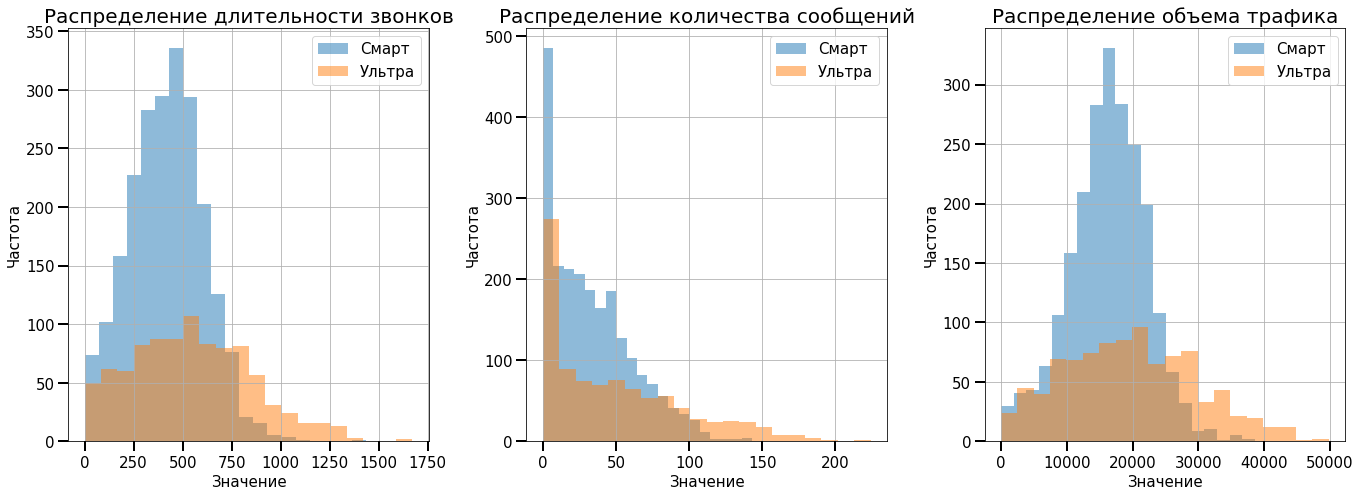

In [ ]:
#Распределение длительности звонков
fig, axes = plt.subplots(ncols = 3, figsize=(19, 7))
axes[0].set_title('Распределение длительности звонков', fontsize=20)
axes[0].set_ylabel('Частота', fontsize=15)
axes[0].set_xlabel('Значение', fontsize=15)
axes[0].tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 15)
axes[0].hist(df_general.loc[df_general['tariff'] == 'smart', 'calls_duration'], bins=20, alpha=0.5)
axes[0].hist(df_general.loc[df_general['tariff'] == 'ultra', 'calls_duration'], bins=20, alpha=0.5)
axes[0].legend(labels=["Смарт","Ультра"], fontsize=15)
axes[0].grid()
fig.tight_layout()

#Распределение количества сообщений
axes[1].set_title('Распределение количества сообщений', fontsize=20)
axes[1].set_ylabel('Частота', fontsize=15)
axes[1].set_xlabel('Значение', fontsize=15)
axes[1].tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 15)
axes[1].hist(df_general.loc[df_general['tariff'] == 'smart', 'messages_count'], bins=20, alpha=0.5)
axes[1].hist(df_general.loc[df_general['tariff'] == 'ultra', 'messages_count'], bins=20, alpha=0.5)
axes[1].legend(labels=["Смарт","Ультра"], fontsize=15)
axes[1].grid()
fig.tight_layout()

#Распределение объема использованного интернет-трафика
axes[2].set_title('Распределение объема трафика', fontsize=20)
axes[2].set_ylabel('Частота', fontsize=15)
axes[2].set_xlabel('Значение', fontsize=15)
axes[2].tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 15)
axes[2].hist(df_general.loc[df_general['tariff'] == 'smart', 'mb_used'], bins=20, alpha=0.5)
axes[2].hist(df_general.loc[df_general['tariff'] == 'ultra', 'mb_used'], bins=20, alpha=0.5)
axes[2].legend(labels=["Смарт","Ультра"], fontsize=15)
axes[2].grid()
fig.tight_layout()

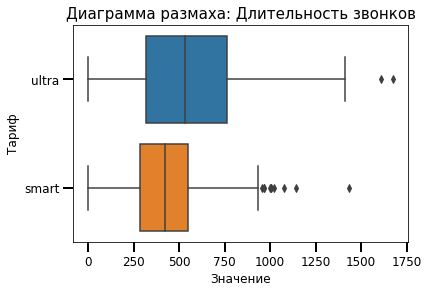

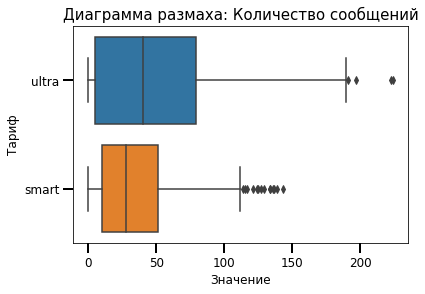

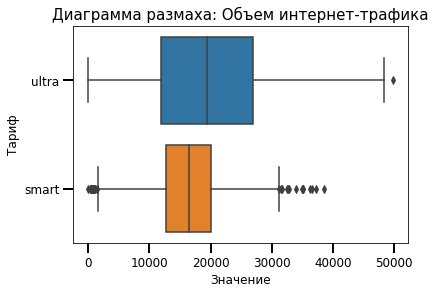

In [ ]:
# Диаграмма размаха: Длительность звонков
sns.boxplot(y="tariff", x="calls_duration", data=df_general, orient="h")
plt.title('Диаграмма размаха: Длительность звонков', fontsize=15)
plt.xlabel('Значение',  fontsize=12)
plt.ylabel('Тариф', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.show()

# Диаграмма размаха: Количество сообщений
sns.boxplot(y="tariff", x="messages_count", data=df_general, orient="h")
plt.title('Диаграмма размаха: Количество сообщений', fontsize=15)
plt.xlabel('Значение',  fontsize=12)
plt.ylabel('Тариф', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.show()

# Диаграмма размаха: Объем интернет-трафика
sns.boxplot(y="tariff", x="mb_used", data=df_general, orient="h")
plt.title('Диаграмма размаха: Объем интернет-трафика', fontsize=15)
plt.xlabel('Значение',  fontsize=12)
plt.ylabel('Тариф', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.show()



Произведем расчеты средней, дисперсии и стандартного отклонения

In [ ]:
columns_to_show=['calls_duration', 'messages_count', 'mb_used']
round(df_general.groupby(['tariff'])[columns_to_show].agg([np.mean, np.std, np.var]))

calls_duration                 messages_count                mb_used  \
                 mean    std      var           mean   std     var     mean   
tariff                                                                        
smart           419.0  189.0  35799.0           33.0  28.0   798.0  16237.0   
ultra           549.0  307.0  94015.0           49.0  47.0  2215.0  19688.0   

                            
           std         var  
tariff                      
smart   5875.0  34510889.0  
ultra   9988.0  99750820.0

**Вывод**
***
Из графиков видно, что большинство пользователей подключены к тарифу "Смарт" - 70% от общего числа пользоватлей, что на 202 больше чем у тарифа "Ультра".

Ниже результаты по каждому из видов поведения:
1. **Звонки** - на тарифе "Смарт", большинство пользователей совершают звонки около 400 минут, когда на тарифе "Ультра" - эта отметка выше - 500 минут.   
Распределение звонков на тарифе "Смарт" - нормальное, с размахом от 0 до 750 минут, на тарифе "Ультра" размах больше, от 0 до 1000 минут. Можно сделать вывод, что на тарифе "Ультра" совершается много звонков с большой длительностью, об это и свидетельствует стандартное отклонение = 290, при средней = 518.

2. **Сообщения** - на обоих тарифах большинство пользователей не отправляют сообщения. Это обяъснимо - сейчас все коммуникации строятся в мессенджерах. На тарифе "Смарт" пользователи максимум отправляют до 100 сообщений, на тарифе "Ультра" до 170. В срденем на тарифе "Смарт" количестов отправляемы  сообщений меньше, чем на тарифе "Ультра".

3. **Интернет-трафик** - данные на тариф "Смарт" распределены нормально, большинство клиентов используют 16000mb ~ 15.6gb. На тарифе "Ультра" это показатель выше и составляет 22000 ~ 21.5gb. Широкий "ящик" на диаграмме рамзмаха позволяет нам  сделать вывод, что на тарифе "Ультра" вариативность использования gb больше - если оценивать межкварильный рамах, то на тарифе "Ульра от 12 до 24 gb, на тарифе "Смарт" - от 12 до 20 gb

## Проверка гипотез


Перед нами стоит задача проверить гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается:
    - **H0**: Средняя выручка пользоватлей тарифов «Ультра» и «Смарт» не различается
    - **H1**: Средняя выручка пользоватлей тарифов «Ультра» и «Смарт» различается

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:
    - **H0**: Средняя выручка пользоватлей из Москвы не имеет отличий от средней выручки других регионов
    - **H1**: Средняя выручка пользоватлей из Москвы отличается от средней выручки других регионов

Прежде чем приступи к проведению теста, необходимо посмотреть на распределение выручки, далле провести работу с выбросами для того, чтобы получить типичное значение.  
Go Go Go!

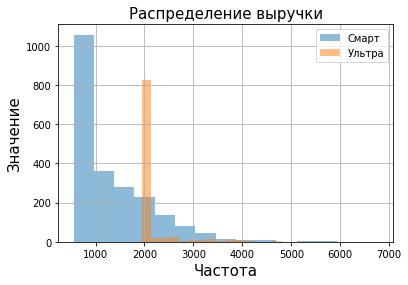

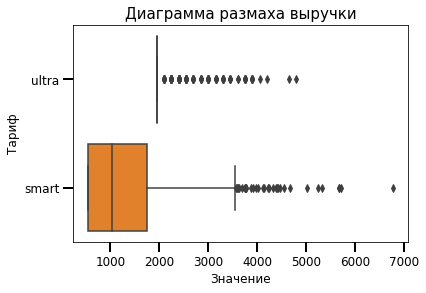

In [ ]:
# Распределение выручки
df_general.loc[df_general['tariff'] == 'smart', 'revenue'].hist(bins=15, alpha=0.5)
df_general.loc[df_general['tariff'] == 'ultra', 'revenue'].hist(bins=15, alpha=0.5)
plt.title('Распределение выручки', fontsize=15)
plt.xlabel('Частота',  fontsize=15)
plt.ylabel('Значение', fontsize=15)
plt.legend(labels=["Смарт","Ультра"], fontsize=10)
plt.show()

# Диаграмма размаха выручки по каждому тарифу
sns.boxplot(y="tariff", x="revenue", data=df_general, orient="h")
plt.title('Диаграмма размаха выручки', fontsize=15)
plt.xlabel('Значение',  fontsize=12)
plt.ylabel('Тариф', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.show()

In [ ]:
df_general.loc[df_general['tariff'] == 'smart', 'revenue'].describe()

count    2222.000000
mean     1295.905041
std       821.680633
min       550.000000
25%       550.000000
50%      1039.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

In [ ]:
df_general.loc[df_general['tariff'] == 'ultra', 'revenue'].describe()

count     941.000000
mean     2073.219979
std       383.925890
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

**Вывод**
***
Для тарифа **"Смарт"** среднее не много зaвышено. 
На диаграмме размаха видно выбросы, начиная с 3500.  
Применим фильтрацию, т.е. уберем значения которые превышают 3500.    
Для тарифа **"Ультра"**, большая доля значений приходится на среднее, значение, выбросы ни значительно влияют на среднюю.    Здесь фильтр применять не будем.

In [ ]:
df_general_filtered_revenue = df_general.drop(df_general[(df_general.tariff == 'smart') & (df_general.revenue >=3500)].index)

**1. Проверка гипотезы о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

Прежде чем производить тест на проверку гипотез, проверим на гомогенность дисперсий через "Тест Левена".  
Это необходимо для правильного выбора параметра `equal_var` и более точных расчетов.

In [ ]:
levene(df_general_filtered_revenue.loc[df_general_filtered_revenue['tariff'] == 'smart', 'revenue'],\
       df_general_filtered_revenue.loc[df_general_filtered_revenue['tariff'] == 'ultra', 'revenue'])

LeveneResult(statistic=657.2844766301046, pvalue=9.909675484130375e-132)

Pvalue < 0.05 говорит нам о том, что дисперсии двух датасетов значимо отличаются.  
То есть в расчете `ttest` , будет использоватья дисперсия каждой выборки.  
Параметр `equal_var = False`

In [ ]:
# критический уровень статистической значимости
alpha = 0.05  

# Сравнеие средней 
results = st.ttest_ind(df_general_filtered_revenue.loc[df_general_filtered_revenue['tariff'] == 'smart', 'revenue'],\
                       df_general_filtered_revenue.loc[df_general_filtered_revenue['tariff'] == 'ultra', 'revenue'],\
                       equal_var = False)

print('p-значение:', results.pvalue)
print('-----------------------------------------------')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.6232103605044608e-297
-----------------------------------------------
Отвергаем нулевую гипотезу


**Вывод**
***
Средняя выручка по тарифу "Смарт" имеет значимые различия с выручкой по тарифу "Ультра".

**2. Проверка гипотезы о том, что средняя выручка пользователей из Москвы и других регионов отличатеся**

Подтянем в датасет `df_general_filtered_revenue` данные по городу из таблицы "Пользователи".

In [ ]:
df_general_filtered_revenue = df_general_filtered_revenue.merge(df_users[['user_id','city']], on='user_id', how='left')

Прежде чем производить тест на проверку гипотез, проверим на гомогенность дисперсий через "Тест Левена".  
Это необходимо для правильного выбора параметра `equal_var` и более точных расчетов.

In [ ]:
levene(df_general_filtered_revenue.loc[df_general_filtered_revenue['city'] == 'Москва', 'revenue'],\
       df_general_filtered_revenue.loc[df_general_filtered_revenue['tariff'] != 'Москва', 'revenue'])

LeveneResult(statistic=3.799312518601955, pvalue=0.05134844823798972)

Pvalue > 0.05 говорит нам о том, что дисперсии двух датасетов не имеют значимых различий.  
То есть в расчете `ttest` , дисперсия каждой выборки будет оценена по объединённому датасету из двух выборок.   
Параметр `equal_var = True`

In [ ]:
# критический уровень статистической значимости
alpha = 0.05 

# Проведеине ttest
results = st.ttest_ind(df_general_filtered_revenue.loc[df_general_filtered_revenue['city'] == 'Москва', 'revenue'],\
       df_general_filtered_revenue.loc[df_general_filtered_revenue['tariff'] != 'Москва', 'revenue'])

print('p-значение:', results.pvalue)
print('-----------------------------------------------')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.21377322319748457
-----------------------------------------------
Не получилось отвергнуть нулевую гипотезу


**Вывод**
***
Значение p-value = 0.21 не позволяет нам отвергнуть нулевую гипотезу.   
То есть, с вероятностью в 21% такое или большее различие можно получить случайно. 

## Общий вывод
***
1. Анализ показал, что большинство пользователей предпочитают тариф "Смарт" - 70% от общего числа, что на 202 больше чем у тарифа "Ультра".  
Исходя из распределений пользования звонками, сообщениями, интернет-трафиком, можно сделать вывод, что тариф "Смарт" - для многих, "Ультра" - специализированный.   
Не смотря на свою высокую абонентскую плату, держатели  тарифа "Ультра" больше пользуются всеми предоставленными в пакете возможностями, то есть размах данных здесь больше:
    - Звонки: "Смарт" длительность от 0 до 750 мин., "Ультра" от 0 до 1000 мин..
    - Сообщения: "Смарт" от 0 до 100 сообшений, "Ультра" 0 до 170
    - Интернет: "Смарт" от 0 до 29gb, "Ультра" 0 до 29 gb.

2. За счет этого тариф **"Ультра"** приносит больше денег, так средняя выручка по этому тарифу составила 2073 руб., что на 827 руб. больше чем на тарифе **"Смарт"**.  
Статистический тест показал, что эти различия значимые.  

3. Статистически значимых различий средней выручки между Москвой и регионами не выявлено.

